In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
# 4.1. Import library: 

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

In [7]:
data = pd.read_csv('data.csv')

In [8]:
data

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [9]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [10]:
data.describe().T

,count,unique,top,freq
Sentence,5842,5322,Managing Director 's comments : `` Net sales f...,2
Sentiment,5842,3,neutral,3130


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [12]:
# count number of words

def num_of_words(df):
    df['word_count'] = df['Sentence'].apply(lambda x : len(str(x).split(" ")))
    print(df[['Sentence','word_count']])


In [13]:
num_of_words(data)

                                               Sentence  word_count
0     The GeoSolutions technology will leverage Bene...          32
1     $ESI on lows, down $1.50 to $2.50 BK a real po...          11
2     For the last quarter of 2010 , Componenta 's n...          39
3     According to the Finnish-Russian Chamber of Co...          20
4     The Swedish buyout firm has sold its remaining...          23
...                                                 ...         ...
5837  RISING costs have forced packaging producer Hu...          17
5838  Nordic Walking was first used as a summer trai...          14
5839  According shipping company Viking Line , the E...          16
5840  In the building and home improvement trade , s...          18
5841  HELSINKI AFX - KCI Konecranes said it has won ...          27

[5842 rows x 2 columns]


In [14]:
# count number of characters

def num_of_chars(df):
    df['char_count'] = df['Sentence'].str.len() ## this also includes spaces
    print(df[['Sentence','char_count']])

In [15]:
num_of_chars(data)

                                               Sentence  char_count
0     The GeoSolutions technology will leverage Bene...         218
1     $ESI on lows, down $1.50 to $2.50 BK a real po...          55
2     For the last quarter of 2010 , Componenta 's n...         193
3     According to the Finnish-Russian Chamber of Co...         128
4     The Swedish buyout firm has sold its remaining...         135
...                                                 ...         ...
5837  RISING costs have forced packaging producer Hu...         107
5838  Nordic Walking was first used as a summer trai...          83
5839  According shipping company Viking Line , the E...          99
5840  In the building and home improvement trade , s...          88
5841  HELSINKI AFX - KCI Konecranes said it has won ...         145

[5842 rows x 2 columns]


In [16]:
# count number of stop words

import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))
stop = stopwords.words('english')

In [17]:
# count of stop words

def stop_words(df):
    df['stopwords'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x in stop]))
    print(df[['Sentence','stopwords']])

In [18]:
stop_words(data)

                                               Sentence  stopwords
0     The GeoSolutions technology will leverage Bene...          6
1     $ESI on lows, down $1.50 to $2.50 BK a real po...          4
2     For the last quarter of 2010 , Componenta 's n...         15
3     According to the Finnish-Russian Chamber of Co...          8
4     The Swedish buyout firm has sold its remaining...          5
...                                                 ...        ...
5837  RISING costs have forced packaging producer Hu...          4
5838  Nordic Walking was first used as a summer trai...          4
5839  According shipping company Viking Line , the E...          4
5840  In the building and home improvement trade , s...          4
5841  HELSINKI AFX - KCI Konecranes said it has won ...          7

[5842 rows x 2 columns]


In [19]:
# count number of special characters

import string

def count_special_characters(df):
    special_chars = set(string.punctuation)
    df['special_chars'] = df['Sentence'].apply(lambda x: len([char for char in x if char in special_chars]))
    print(df[['Sentence', 'special_chars']].head())

In [20]:
count_special_characters(data)

                                            Sentence  special_chars
0  The GeoSolutions technology will leverage Bene...              4
1  $ESI on lows, down $1.50 to $2.50 BK a real po...              6
2  For the last quarter of 2010 , Componenta 's n...              6
3  According to the Finnish-Russian Chamber of Co...              3
4  The Swedish buyout firm has sold its remaining...              3


In [21]:
# number of numerics

def num_numerics(df):
    df['numerics'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
    print(df[['Sentence','numerics']].head())

In [22]:
num_numerics(data)

                                            Sentence  numerics
0  The GeoSolutions technology will leverage Bene...         0
1  $ESI on lows, down $1.50 to $2.50 BK a real po...         0
2  For the last quarter of 2010 , Componenta 's n...         1
3  According to the Finnish-Russian Chamber of Co...         0
4  The Swedish buyout firm has sold its remaining...         0


In [23]:
# number of digits

def num_digits(df):
    df['numerics'] = df['Sentence'].apply(lambda x: len([char for char in x if char.isdigit()]))
    print(df[['Sentence','numerics']].head())

In [24]:
num_digits(data)

                                            Sentence  numerics
0  The GeoSolutions technology will leverage Bene...         0
1  $ESI on lows, down $1.50 to $2.50 BK a real po...         6
2  For the last quarter of 2010 , Componenta 's n...        10
3  According to the Finnish-Russian Chamber of Co...         0
4  The Swedish buyout firm has sold its remaining...         3


In [25]:
# number of upper case words (if all word characters are upper case)

def num_uppercase(df):
    df['upper_case'] = df['Sentence'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    print(df[['Sentence','upper_case']].head())

In [26]:
num_uppercase(data)

                                            Sentence  upper_case
0  The GeoSolutions technology will leverage Bene...           1
1  $ESI on lows, down $1.50 to $2.50 BK a real po...           2
2  For the last quarter of 2010 , Componenta 's n...           0
3  According to the Finnish-Russian Chamber of Co...           0
4  The Swedish buyout firm has sold its remaining...           0


In [27]:
# number of most frequant

freq = pd.Series(' '.join(data['Sentence']).split()).value_counts()[:10]
freq

the    4787
.      4664
,      4473
of     3311
in     2895
to     2755
and    2491
a      1769
The    1308
for    1282
dtype: int64

In [28]:
# number of rare frequant

rare_freq = pd.Series(' '.join(data['Sentence']).split()).value_counts()[-10:]
rare_freq

65,200                     1
Signs                      1
Up,                        1
Desano                     1
barleycorn                 1
@78.47                     1
:D                         1
Aramco,                    1
Motiva,                    1
https://t.co/mK7MEMtADT    1
dtype: int64

In [29]:
# sentiment (Classes) count

data['Sentiment'].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

<AxesSubplot:>

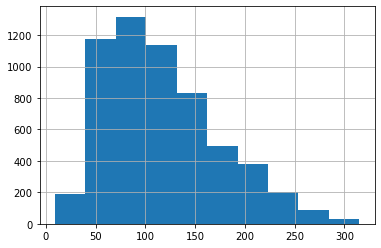

In [30]:
# hist for sentences length

data['Sentence'].str.len().hist()

Text(0.5, 1.0, 'Neutral Sentences')

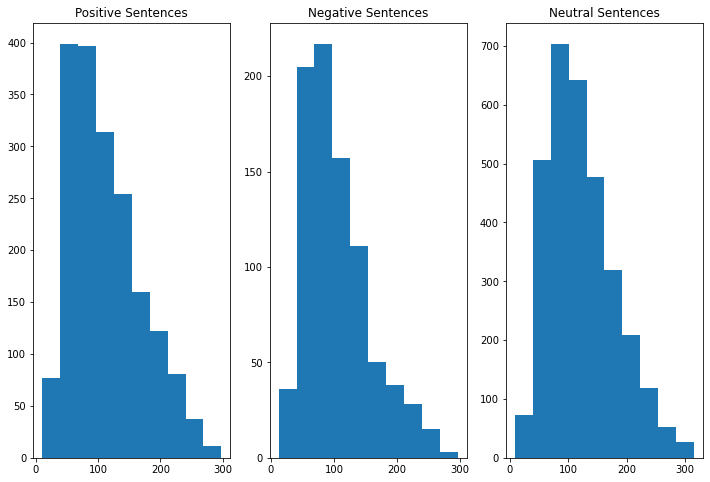

In [31]:
# hist for sentences length for each class indivisually

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,8))
ax1.hist(data[data['Sentiment']=='positive']['Sentence'].str.len())
ax1.set_title( 'Positive Sentences')
ax2.hist(data[data['Sentiment']=='negative']['Sentence'].str.len())
ax2.set_title( 'Negative Sentences')
ax3.hist(data[data['Sentiment']=='neutral']['Sentence'].str.len())
ax3.set_title( 'Neutral Sentences')

In [32]:
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
   
    #removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   

   # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
     
    return text
    
dt = data['Sentence'].apply(cleaning)

In [33]:
data['Sentiment']

0       positive
1       negative
2       positive
3        neutral
4        neutral
          ...   
5837    negative
5838     neutral
5839     neutral
5840     neutral
5841    positive
Name: Sentiment, Length: 5842, dtype: object

In [34]:
dt = pd.DataFrame(dt)  
dt['Sentiment']=data['Sentiment']
dt

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down to bk a real possibility,negative
2,for the last quarter of componenta s net sal...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,according shipping company viking line the eu...,neutral
5840,in the building and home improvement trade sa...,neutral


In [36]:
# remove stop words

# 4.1. Import library: 

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

dt['no_sw'] = dt['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


In [37]:
dt

,Sentence,Sentiment,no_sw
0,the geosolutions technology will leverage bene...,positive,geosolutions technology leverage benefon gps s...
1,esi on lows down to bk a real possibility,negative,esi lows bk real possibility
2,for the last quarter of componenta s net sal...,positive,quarter componenta net sales doubled eur131m e...
3,according to the finnishrussian chamber of com...,neutral,finnishrussian chamber commerce major construc...
4,the swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining percent sta...
...,...,...,...
5837,rising costs have forced packaging producer hu...,negative,rising costs forced packaging producer huhtama...
5838,nordic walking was first used as a summer trai...,neutral,nordic walking summer training method crosscou...
5839,according shipping company viking line the eu...,neutral,shipping company viking line decision signific...
5840,in the building and home improvement trade sa...,neutral,building home improvement trade sales decrease...


In [52]:
# count of the most Frequent Words in no_sw ( after remove stop words )

from collections import Counter
cnt = Counter()
for text in dt["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,eur,1284
1,company,809
2,mn,729
3,profit,568
4,sales,560
5,finnish,527
6,net,499
7,million,493
8,operating,371
9,mln,350


In [53]:
# hist or bar for most Frequent Words

px.bar(temp, x="count", y="word", title='Commmon Words in Sentences', orientation='h', 
             width=700, height=700)

In [54]:
# Remove the most frequent words

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
dt["wo_stopfreq"] = dt["no_sw"].apply(lambda text: remove_freqwords(text))
dt.head()

,Sentence,Sentiment,no_sw,wo_stopfreq,wo_stopfreq_lem
0,the geosolutions technology will leverage bene...,positive,geosolutions technology leverage benefon gps s...,geosolutions technology leverage benefon gps s...,geosolutions technology leverage benefon gps s...
1,esi on lows down to bk a real possibility,negative,esi lows bk real possibility,esi lows bk real possibility,esi lows bk real possibility
2,for the last quarter of componenta s net sal...,positive,quarter componenta net sales doubled eur131m e...,quarter componenta doubled eur131m eur76m peri...,quarter componenta doubled eur131m eur76m peri...
3,according to the finnishrussian chamber of com...,neutral,finnishrussian chamber commerce major construc...,finnishrussian chamber commerce major construc...,finnishrussian chamber commerce major construc...
4,the swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining percent sta...,swedish buyout firm sold remaining percent sta...,swedish buyout firm sold remaining percent sta...


In [55]:
# Lemmatization
# import nltk
# nltk.download('omw-1.4')
wordnet_lem = WordNetLemmatizer()

dt['wo_stopfreq_lem'] = dt['wo_stopfreq'].apply(wordnet_lem.lemmatize)
dt

,Sentence,Sentiment,no_sw,wo_stopfreq,wo_stopfreq_lem
0,the geosolutions technology will leverage bene...,positive,geosolutions technology leverage benefon gps s...,geosolutions technology leverage benefon gps s...,geosolutions technology leverage benefon gps s...
1,esi on lows down to bk a real possibility,negative,esi lows bk real possibility,esi lows bk real possibility,esi lows bk real possibility
2,for the last quarter of componenta s net sal...,positive,quarter componenta net sales doubled eur131m e...,quarter componenta doubled eur131m eur76m peri...,quarter componenta doubled eur131m eur76m peri...
3,according to the finnishrussian chamber of com...,neutral,finnishrussian chamber commerce major construc...,finnishrussian chamber commerce major construc...,finnishrussian chamber commerce major construc...
4,the swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining percent sta...,swedish buyout firm sold remaining percent sta...,swedish buyout firm sold remaining percent sta...
...,...,...,...,...,...
5837,rising costs have forced packaging producer hu...,negative,rising costs forced packaging producer huhtama...,rising costs forced packaging producer huhtama...,rising costs forced packaging producer huhtama...
5838,nordic walking was first used as a summer trai...,neutral,nordic walking summer training method crosscou...,nordic walking summer training method crosscou...,nordic walking summer training method crosscou...
5839,according shipping company viking line the eu...,neutral,shipping company viking line decision signific...,shipping viking line decision significant fina...,shipping viking line decision significant fina...
5840,in the building and home improvement trade sa...,neutral,building home improvement trade sales decrease...,building home improvement trade decreased,building home improvement trade decreased


In [56]:
nb=dt.drop(columns=['no_sw', 'wo_stopfreq','wo_stopfreq_lem'])
nb.columns=['Sentence','Sentiment']
nb.Sentiment = [0 if each == "negative" else 1 if each == "positive" else 2 for each in nb.Sentiment]
nb

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,1
1,esi on lows down to bk a real possibility,0
2,for the last quarter of componenta s net sal...,1
3,according to the finnishrussian chamber of com...,2
4,the swedish buyout firm has sold its remaining...,2
...,...,...
5837,rising costs have forced packaging producer hu...,0
5838,nordic walking was first used as a summer trai...,2
5839,according shipping company viking line the eu...,2
5840,in the building and home improvement trade sa...,2


In [57]:
tokenized_review=nb['Sentence'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [the, geosolutions, technology, will, leverage...
1    [esi, on, lows, down, to, bk, a, real, possibi...
2    [for, the, last, quarter, of, componenta, s, n...
3    [according, to, the, finnishrussian, chamber, ...
4    [the, swedish, buyout, firm, has, sold, its, r...
Name: Sentence, dtype: object

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(nb['Sentence'])

In [59]:
from sklearn.model_selection import train_test_split
X=text_counts
y=nb['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=30)

In [60]:
from sklearn.naive_bayes  import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))


ComplementNB model accuracy is 66.04%
------------------------------------------------
Confusion Matrix:
     0    1    2
0   72   29   53
1   41  265   78
2  109   87  435
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.47      0.38       154
           1       0.70      0.69      0.69       384
           2       0.77      0.69      0.73       631

    accuracy                           0.66      1169
   macro avg       0.60      0.62      0.60      1169
weighted avg       0.69      0.66      0.67      1169



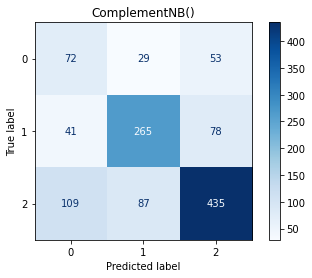

In [68]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

k = [CNB]

for model in k:
    disp = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
    disp.ax_.set_title(str(model))
    plt.show()


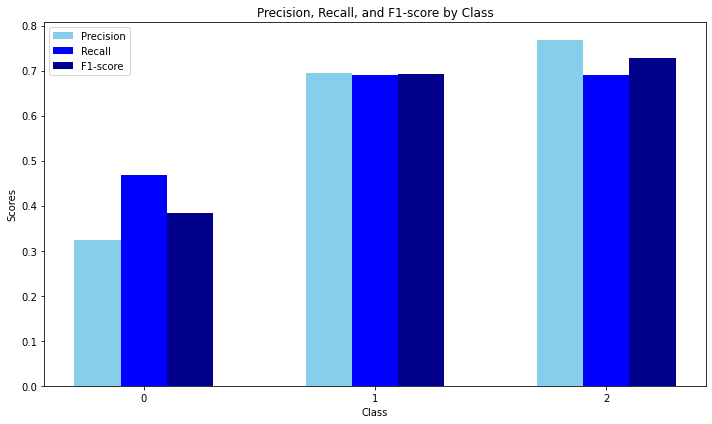

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Get precision, recall, and F1-score from classification report
report = classification_report(y_test, predicted, output_dict=True)
precision = [report[label]['precision'] for label in report.keys() if label.isdigit()]
recall = [report[label]['recall'] for label in report.keys() if label.isdigit()]
f1_score = [report[label]['f1-score'] for label in report.keys() if label.isdigit()]

# Get class labels
class_labels = [int(label) for label in report.keys() if label.isdigit()]

# Custom colors
precision_color = 'skyblue'
recall_color = 'blue'
f1_score_color = 'darkblue'

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

index = np.arange(len(class_labels))
bar_width = 0.2

precision_bar = ax.bar(index, precision, bar_width, label='Precision', color=precision_color)
recall_bar = ax.bar(index + bar_width, recall, bar_width, label='Recall', color=recall_color)
f1_score_bar = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-score', color=f1_score_color)

ax.set_xlabel('Class')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(class_labels)
ax.legend()

plt.tight_layout()
plt.show()


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Random Forest
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
predicted_RF = RF.predict(X_test)
accuracy_RF = metrics.accuracy_score(predicted_RF, y_test)

print('Random Forest model accuracy is', str('{:04.2f}'.format(accuracy_RF * 100)) + '%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted_RF)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted_RF))

# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predicted_LR = LR.predict(X_test)
accuracy_LR = metrics.accuracy_score(predicted_LR, y_test)

print('Logistic Regression model accuracy is', str('{:04.2f}'.format(accuracy_LR * 100)) + '%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted_LR)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted_LR))


Random Forest model accuracy is 64.84%
------------------------------------------------
Confusion Matrix:
    0    1    2
0  23   16  115
1  19  222  143
2  88   30  513
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.15      0.16       154
           1       0.83      0.58      0.68       384
           2       0.67      0.81      0.73       631

    accuracy                           0.65      1169
   macro avg       0.56      0.51      0.52      1169
weighted avg       0.65      0.65      0.64      1169

Logistic Regression model accuracy is 65.44%
------------------------------------------------
Confusion Matrix:
    0    1    2
0  32   18  104
1  23  240  121
2  78   60  493
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.21      0.22       154
           1       0